# Modelling

## Data Preparation

In [1]:
#load libraries
import tensorflow as tf
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [2]:
import pandas as pd
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential

In [3]:
#load the data
x_train = pd.read_csv('x_train_full.csv')

In [4]:
y_train = pd.read_csv('y_train_full.csv')

In [5]:
x_train

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,0,0.105882,0.105882,0.113725,0.109804,0.113725,0.109804,0.109804,0.121569,0.113725,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,0.400000,0.231373,0.203922,0.168627,0.309804,0.333333,0.333333,0.368627,0.392157,...,0.631373,0.619608,0.317647,0.270588,0.168627,0.105882,0.039216,0.000000,0.000000,0.000000
2,2,0.164706,0.243137,0.278431,0.329412,0.333333,0.356863,0.384314,0.396078,0.478431,...,0.443137,0.219608,0.078431,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3,0.000000,0.039216,0.082353,0.137255,0.164706,0.192157,0.211765,0.258824,0.266667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,4,0.439216,0.466667,0.462745,0.486274,0.521569,0.725490,0.686275,0.662745,0.635294,...,0.498039,0.435294,0.286275,0.243137,0.160784,0.019608,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5211,3870,0.000000,0.000000,0.043137,0.043137,1.000000,0.066667,0.082353,0.090196,0.098039,...,0.039216,0.039216,0.047059,0.047059,0.054902,0.066667,0.074510,0.094118,0.109804,0.133333
5212,3871,0.160784,0.168627,0.164706,0.196078,0.203922,0.211765,0.211765,0.231373,0.219608,...,0.015686,0.062745,0.086275,0.086275,0.094118,0.105882,0.133333,0.141176,0.086275,0.094118
5213,3872,0.031373,0.043137,0.035294,1.000000,0.043137,0.050980,0.062745,0.066667,0.074510,...,0.317647,0.098039,0.050980,0.031373,0.019608,0.007843,0.000000,0.000000,0.000000,0.000000
5214,3873,0.152941,0.156863,0.160784,0.156863,0.160784,0.160784,0.156863,0.211765,0.192157,...,0.105882,0.117647,0.109804,0.109804,0.117647,0.117647,0.117647,0.121569,0.117647,0.098039


In [6]:
#remove Unnamed:0 column
x_train = x_train.iloc[:, 1:16385]

In [7]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,0.105882,0.105882,0.113725,0.109804,0.113725,0.109804,0.109804,0.121569,0.113725,0.117647,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.400000,0.231373,0.203922,0.168627,0.309804,0.333333,0.333333,0.368627,0.392157,0.423529,...,0.631373,0.619608,0.317647,0.270588,0.168627,0.105882,0.039216,0.000000,0.000000,0.000000
2,0.164706,0.243137,0.278431,0.329412,0.333333,0.356863,0.384314,0.396078,0.478431,0.733333,...,0.443137,0.219608,0.078431,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.039216,0.082353,0.137255,0.164706,0.192157,0.211765,0.258824,0.266667,0.313725,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.439216,0.466667,0.462745,0.486274,0.521569,0.725490,0.686275,0.662745,0.635294,0.662745,...,0.498039,0.435294,0.286275,0.243137,0.160784,0.019608,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5211,0.000000,0.000000,0.043137,0.043137,1.000000,0.066667,0.082353,0.090196,0.098039,0.098039,...,0.039216,0.039216,0.047059,0.047059,0.054902,0.066667,0.074510,0.094118,0.109804,0.133333
5212,0.160784,0.168627,0.164706,0.196078,0.203922,0.211765,0.211765,0.231373,0.219608,0.223529,...,0.015686,0.062745,0.086275,0.086275,0.094118,0.105882,0.133333,0.141176,0.086275,0.094118
5213,0.031373,0.043137,0.035294,1.000000,0.043137,0.050980,0.062745,0.066667,0.074510,0.094118,...,0.317647,0.098039,0.050980,0.031373,0.019608,0.007843,0.000000,0.000000,0.000000,0.000000
5214,0.152941,0.156863,0.160784,0.156863,0.160784,0.160784,0.156863,0.211765,0.192157,0.188235,...,0.105882,0.117647,0.109804,0.109804,0.117647,0.117647,0.117647,0.121569,0.117647,0.098039


In [8]:
y_train

,Unnamed: 0,has_Pneumonia?
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
5211,3870,1
5212,3871,1
5213,3872,1
5214,3873,1


In [9]:
#remove Unnamed:0 column
y_train = y_train.iloc[:, 1:2]

In [10]:
y_train

,has_Pneumonia?
0,0
1,0
2,0
3,0
4,0
...,...
5211,1
5212,1
5213,1
5214,1


In [11]:
x_test = pd.read_csv('x_test_full.csv')

In [12]:
x_test

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,0,0.078431,0.094118,0.082353,0.074510,0.086275,0.078431,0.078431,0.070588,0.070588,...,0.109804,0.117647,0.125490,0.145098,0.129412,0.125490,0.113725,0.105882,0.160784,0.180392
1,1,0.003922,0.011765,0.011765,0.015686,0.019608,0.023529,0.023529,0.023529,0.027451,...,0.011765,0.023529,0.011765,0.023529,0.011765,0.027451,0.023529,0.019608,0.027451,0.015686
2,2,0.270588,0.298039,0.215686,0.219608,0.192157,0.164706,0.121569,0.047059,0.000000,...,0.098039,0.031373,0.007843,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3,0.000000,0.000000,0.000000,0.000000,0.007843,0.047059,0.047059,0.047059,0.047059,...,0.050980,0.050980,0.062745,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,4,0.050980,0.113725,0.243137,0.329412,0.392157,0.443137,0.435294,0.435294,0.458824,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,385,0.172549,0.164706,0.176471,0.176471,0.180392,0.180392,0.215686,0.227451,0.231373,...,0.549020,0.450980,0.345098,0.121569,0.450980,0.133333,0.098039,0.117647,0.117647,0.117647
620,386,0.070588,0.078431,0.090196,0.058824,0.035294,0.058824,0.101961,0.200000,0.188235,...,0.054902,0.070588,0.078431,0.086275,0.090196,0.094118,0.094118,0.094118,0.094118,0.098039
621,387,0.854902,0.874510,0.835294,0.866667,0.878431,0.850980,0.780392,0.713726,0.231373,...,0.058824,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.066667,0.066667
622,388,0.764706,0.701961,0.694118,0.450980,0.156863,0.200000,0.164706,0.164706,0.168627,...,0.203922,0.043137,0.066667,0.078431,0.086275,0.086275,0.090196,0.090196,0.090196,0.094118


In [13]:
#remove Unnamed:0 column
x_test = x_test.iloc[:, 1:16385]

In [14]:
x_test

,0,1,2,3,4,5,6,7,8,9,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,0.078431,0.094118,0.082353,0.074510,0.086275,0.078431,0.078431,0.070588,0.070588,0.086275,...,0.109804,0.117647,0.125490,0.145098,0.129412,0.125490,0.113725,0.105882,0.160784,0.180392
1,0.003922,0.011765,0.011765,0.015686,0.019608,0.023529,0.023529,0.023529,0.027451,0.031373,...,0.011765,0.023529,0.011765,0.023529,0.011765,0.027451,0.023529,0.019608,0.027451,0.015686
2,0.270588,0.298039,0.215686,0.219608,0.192157,0.164706,0.121569,0.047059,0.000000,0.003922,...,0.098039,0.031373,0.007843,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.007843,0.047059,0.047059,0.047059,0.047059,0.043137,...,0.050980,0.050980,0.062745,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.050980,0.113725,0.243137,0.329412,0.392157,0.443137,0.435294,0.435294,0.458824,0.447059,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,0.172549,0.164706,0.176471,0.176471,0.180392,0.180392,0.215686,0.227451,0.231373,0.231373,...,0.549020,0.450980,0.345098,0.121569,0.450980,0.133333,0.098039,0.117647,0.117647,0.117647
620,0.070588,0.078431,0.090196,0.058824,0.035294,0.058824,0.101961,0.200000,0.188235,0.211765,...,0.054902,0.070588,0.078431,0.086275,0.090196,0.094118,0.094118,0.094118,0.094118,0.098039
621,0.854902,0.874510,0.835294,0.866667,0.878431,0.850980,0.780392,0.713726,0.231373,0.039216,...,0.058824,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.066667,0.066667
622,0.764706,0.701961,0.694118,0.450980,0.156863,0.200000,0.164706,0.164706,0.168627,0.188235,...,0.203922,0.043137,0.066667,0.078431,0.086275,0.086275,0.090196,0.090196,0.090196,0.094118


In [15]:
y_test = pd.read_csv('y_test_full.csv')

In [16]:
y_test

,Unnamed: 0,has_Pneumonia?
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
619,385,1
620,386,1
621,387,1
622,388,1


In [17]:
#remove Unnamed:0 column
y_test = y_test.iloc[:, 1:2]

In [18]:
y_test

,has_Pneumonia?
0,0
1,0
2,0
3,0
4,0
...,...
619,1
620,1
621,1
622,1


In [19]:
x_train.shape

(5216, 16384)

In [20]:
x_train = x_train.values.reshape(5216,128,128,1)

In [21]:
x_train.shape

(5216, 128, 128, 1)

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images horizontally
    vertical_flip=False, # Don't randomly flip images vertically
)  


In [23]:
datagen.fit(x_train)

In [24]:
x_test = x_test.values.reshape(624, 128, 128, 1)

In [25]:
x_test.shape

(624, 128, 128, 1)

## Modelling

In [26]:
model_one = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = (128,128,1)), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])

In [27]:
model_one.compile(optimizer = tf.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [28]:
history = model_one.fit(x_train, y_train, 
      steps_per_epoch = 8,
      epochs=1,            
      verbose=1,
      validation_data = (x_test, y_test),
      validation_steps = 8)


Epoch 1/30
8/8 [==============================] - 2s 163ms/step - loss: 6.1344 - accuracy: 0.5325 - val_loss: 5.8855 - val_accuracy: 0.6250
Epoch 2/30
8/8 [==============================] - 1s 104ms/step - loss: 4.6541 - accuracy: 0.7405 - val_loss: 1.2917 - val_accuracy: 0.6250
Epoch 3/30
8/8 [==============================] - 1s 82ms/step - loss: 1.2054 - accuracy: 0.5952 - val_loss: 2.7324 - val_accuracy: 0.6250
Epoch 4/30
8/8 [==============================] - 1s 113ms/step - loss: 1.0744 - accuracy: 0.7468 - val_loss: 0.7656 - val_accuracy: 0.7051
Epoch 5/30
8/8 [==============================] - 1s 87ms/step - loss: 0.5053 - accuracy: 0.8159 - val_loss: 0.4932 - val_accuracy: 0.7708
Epoch 6/30
8/8 [==============================] - 1s 107ms/step - loss: 0.3732 - accuracy: 0.8510 - val_loss: 0.4051 - val_accuracy: 0.8109
Epoch 7/30
8/8 [==============================] - 1s 76ms/step - loss: 0.2828 - accuracy: 0.8781 - val_loss: 0.5202 - val_accuracy: 0.7692
Epoch 8/30
8/8 [=======

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


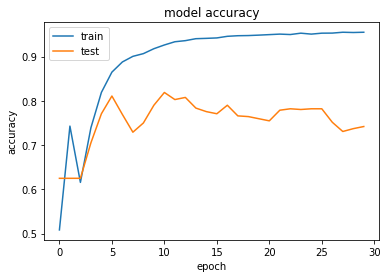

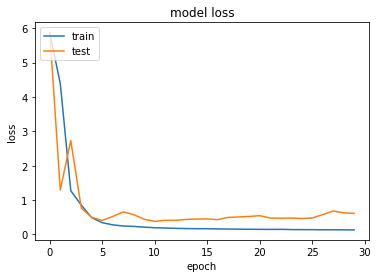

In [29]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
model_two = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(128, 128, 1)),
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')])


In [31]:
model_two.compile(optimizer = tf.optimizers.RMSprop(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [32]:
history = model_two.fit(x_train, y_train, 
      steps_per_epoch = 8,
      epochs=30,            
      verbose=1,
      validation_data = (x_test, y_test),
      validation_steps = 8)

Epoch 1/30
8/8 [==============================] - 20s 2s/step - loss: 4.1880 - accuracy: 0.6609 - val_loss: 1.3600 - val_accuracy: 0.6250
Epoch 2/30
8/8 [==============================] - 18s 2s/step - loss: 0.6596 - accuracy: 0.7548 - val_loss: 0.5932 - val_accuracy: 0.6779
Epoch 3/30
8/8 [==============================] - 18s 2s/step - loss: 0.5933 - accuracy: 0.7522 - val_loss: 0.5611 - val_accuracy: 0.7372
Epoch 4/30
8/8 [==============================] - 18s 2s/step - loss: 0.4393 - accuracy: 0.8663 - val_loss: 0.5407 - val_accuracy: 0.7244
Epoch 5/30
8/8 [==============================] - 18s 2s/step - loss: 0.2444 - accuracy: 0.9182 - val_loss: 1.2546 - val_accuracy: 0.6330
Epoch 6/30
8/8 [==============================] - 18s 2s/step - loss: 0.2538 - accuracy: 0.8959 - val_loss: 0.9447 - val_accuracy: 0.7212
Epoch 7/30
8/8 [==============================] - 18s 2s/step - loss: 0.1648 - accuracy: 0.9401 - val_loss: 1.5783 - val_accuracy: 0.6282
Epoch 8/30
8/8 [==================

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


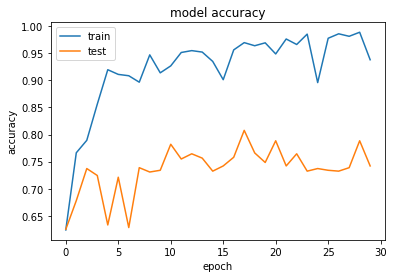

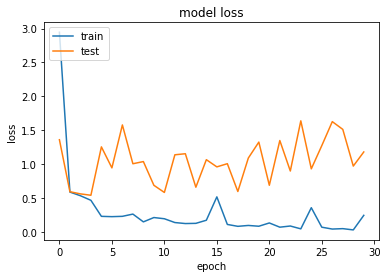

In [33]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [34]:
model_three = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(128, 128, 1)),
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')])



In [35]:
model_three.compile(optimizer = tf.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [36]:
history = model_three.fit(x_train, y_train, 
      steps_per_epoch = 8,
      epochs=20,            
      verbose=1,
      validation_data = (x_test, y_test),
      validation_steps = 8)

Epoch 1/20
8/8 [==============================] - 19s 2s/step - loss: 0.6184 - accuracy: 0.5879 - val_loss: 0.6857 - val_accuracy: 0.6250
Epoch 2/20
8/8 [==============================] - 18s 2s/step - loss: 0.5073 - accuracy: 0.7522 - val_loss: 0.5161 - val_accuracy: 0.6571
Epoch 3/20
8/8 [==============================] - 17s 2s/step - loss: 0.3976 - accuracy: 0.8442 - val_loss: 0.5321 - val_accuracy: 0.6955
Epoch 4/20
8/8 [==============================] - 18s 2s/step - loss: 0.2652 - accuracy: 0.8890 - val_loss: 0.4068 - val_accuracy: 0.8349
Epoch 5/20
8/8 [==============================] - 18s 2s/step - loss: 0.1829 - accuracy: 0.9297 - val_loss: 0.8119 - val_accuracy: 0.7244
Epoch 6/20
8/8 [==============================] - 17s 2s/step - loss: 0.1467 - accuracy: 0.9443 - val_loss: 0.6954 - val_accuracy: 0.7564
Epoch 7/20
8/8 [==============================] - 19s 2s/step - loss: 0.1111 - accuracy: 0.9582 - val_loss: 1.0074 - val_accuracy: 0.7212
Epoch 8/20
8/8 [==================

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


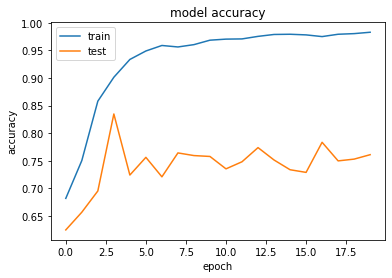

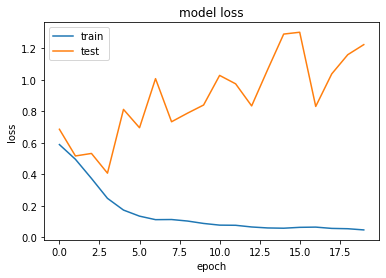

In [37]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
history = model_three.fit(x_train, y_train, 
      steps_per_epoch = 10,
      epochs=20,            
      verbose=1,
      validation_data = (x_test, y_test),
      validation_steps = 10)

Epoch 1/20
10/10 [==============================] - 22s 2s/step - loss: 0.0425 - accuracy: 0.9850 - val_loss: 1.3762 - val_accuracy: 0.7548
Epoch 2/20
10/10 [==============================] - 21s 2s/step - loss: 0.0371 - accuracy: 0.9872 - val_loss: 1.4210 - val_accuracy: 0.7468
Epoch 3/20
10/10 [==============================] - 20s 2s/step - loss: 0.0484 - accuracy: 0.9812 - val_loss: 0.9402 - val_accuracy: 0.7788
Epoch 4/20
10/10 [==============================] - 20s 2s/step - loss: 0.0405 - accuracy: 0.9852 - val_loss: 1.3077 - val_accuracy: 0.7516
Epoch 5/20
10/10 [==============================] - 20s 2s/step - loss: 0.0323 - accuracy: 0.9898 - val_loss: 1.5160 - val_accuracy: 0.7452
Epoch 6/20
10/10 [==============================] - 20s 2s/step - loss: 0.0336 - accuracy: 0.9870 - val_loss: 1.3994 - val_accuracy: 0.7628
Epoch 7/20
10/10 [==============================] - 20s 2s/step - loss: 0.0266 - accuracy: 0.9914 - val_loss: 1.1952 - val_accuracy: 0.7740
Epoch 8/20
10/10 [==

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


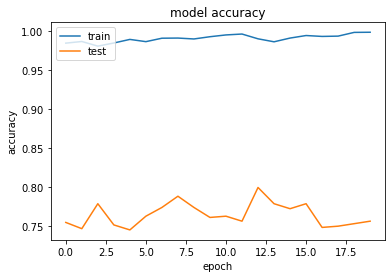

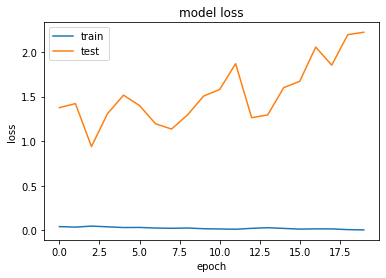

In [39]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [40]:
history = model_three.fit(x_train, y_train, 
      batch_size = 100,
      epochs=20,            
      verbose=1,
      validation_data = (x_test, y_test))

Epoch 1/20
53/53 [==============================] - 26s 482ms/step - loss: 0.0732 - accuracy: 0.9743 - val_loss: 1.5185 - val_accuracy: 0.7067
Epoch 2/20
53/53 [==============================] - 25s 473ms/step - loss: 0.0749 - accuracy: 0.9718 - val_loss: 1.0093 - val_accuracy: 0.7804
Epoch 3/20
53/53 [==============================] - 24s 462ms/step - loss: 0.0475 - accuracy: 0.9822 - val_loss: 1.9832 - val_accuracy: 0.7420
Epoch 4/20
53/53 [==============================] - 24s 457ms/step - loss: 0.0271 - accuracy: 0.9896 - val_loss: 1.8574 - val_accuracy: 0.7644
Epoch 5/20
53/53 [==============================] - 26s 485ms/step - loss: 0.0166 - accuracy: 0.9944 - val_loss: 3.3024 - val_accuracy: 0.7308
Epoch 6/20
53/53 [==============================] - 25s 464ms/step - loss: 0.0286 - accuracy: 0.9896 - val_loss: 2.8747 - val_accuracy: 0.7131
Epoch 7/20
53/53 [==============================] - 25s 469ms/step - loss: 0.0367 - accuracy: 0.9873 - val_loss: 2.0840 - val_accuracy: 0.7484

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


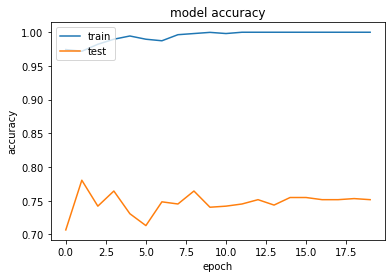

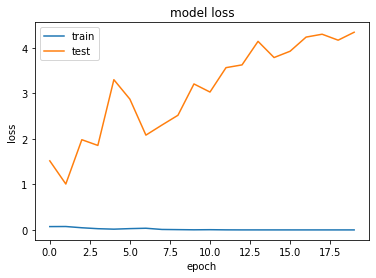

In [41]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [42]:
history = model_one.fit(x_train, y_train, 
      batch_size = 100,
      epochs=30,            
      verbose=1,
      validation_data = (x_test, y_test))

Epoch 1/30
53/53 [==============================] - 2s 21ms/step - loss: 0.1275 - accuracy: 0.9544 - val_loss: 0.7608 - val_accuracy: 0.7212
Epoch 2/30
53/53 [==============================] - 1s 21ms/step - loss: 0.1355 - accuracy: 0.9482 - val_loss: 0.7282 - val_accuracy: 0.7340
Epoch 3/30
53/53 [==============================] - 1s 25ms/step - loss: 0.1218 - accuracy: 0.9561 - val_loss: 0.8032 - val_accuracy: 0.7244
Epoch 4/30
53/53 [==============================] - 1s 21ms/step - loss: 0.1196 - accuracy: 0.9534 - val_loss: 0.4792 - val_accuracy: 0.7997
Epoch 5/30
53/53 [==============================] - 1s 19ms/step - loss: 0.1138 - accuracy: 0.9597 - val_loss: 0.8032 - val_accuracy: 0.7324
Epoch 6/30
53/53 [==============================] - 1s 26ms/step - loss: 0.1226 - accuracy: 0.9542 - val_loss: 1.1201 - val_accuracy: 0.7067
Epoch 7/30
53/53 [==============================] - 1s 20ms/step - loss: 0.1094 - accuracy: 0.9574 - val_loss: 0.4546 - val_accuracy: 0.8141
Epoch 8/30
53

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


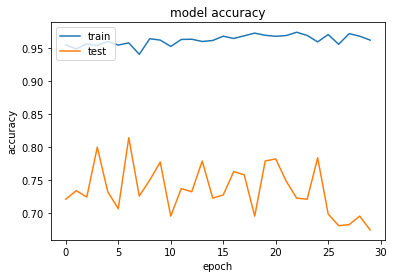

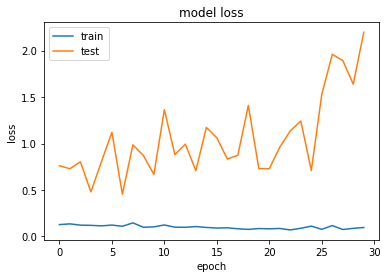

In [43]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [44]:
history = model_one.fit(x_train, y_train, 
      batch_size = 20,
      epochs=30,            
      verbose=1,
      validation_data = (x_test, y_test))

Epoch 1/30
261/261 [==============================] - 3s 10ms/step - loss: 0.2527 - accuracy: 0.9206 - val_loss: 1.4104 - val_accuracy: 0.7019
Epoch 2/30
261/261 [==============================] - 3s 11ms/step - loss: 0.1430 - accuracy: 0.9454 - val_loss: 0.6703 - val_accuracy: 0.7853
Epoch 3/30
261/261 [==============================] - 5s 19ms/step - loss: 0.1028 - accuracy: 0.9620 - val_loss: 0.6799 - val_accuracy: 0.7756
Epoch 4/30
261/261 [==============================] - 5s 20ms/step - loss: 0.1361 - accuracy: 0.9488 - val_loss: 1.3542 - val_accuracy: 0.7019
Epoch 5/30
261/261 [==============================] - 4s 17ms/step - loss: 0.1003 - accuracy: 0.9628 - val_loss: 1.5812 - val_accuracy: 0.6907
Epoch 6/30
261/261 [==============================] - 4s 14ms/step - loss: 0.0958 - accuracy: 0.9636 - val_loss: 0.9545 - val_accuracy: 0.7548
Epoch 7/30
261/261 [==============================] - 3s 13ms/step - loss: 0.0976 - accuracy: 0.9624 - val_loss: 1.2526 - val_accuracy: 0.7083

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


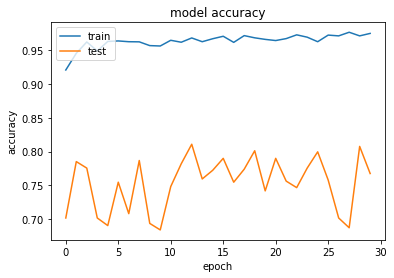

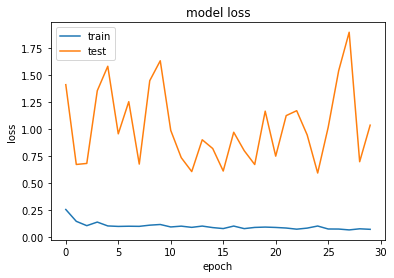

In [45]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [46]:
history = model_one.fit(x_train, y_train, 
      batch_size = 100,
      epochs=50,            
      verbose=1,
      validation_data = (x_test, y_test))

Epoch 1/50
53/53 [==============================] - 2s 30ms/step - loss: 0.0428 - accuracy: 0.9854 - val_loss: 1.1204 - val_accuracy: 0.7612
Epoch 2/50
53/53 [==============================] - 1s 20ms/step - loss: 0.0376 - accuracy: 0.9860 - val_loss: 1.2088 - val_accuracy: 0.7452
Epoch 3/50
53/53 [==============================] - 1s 18ms/step - loss: 0.0389 - accuracy: 0.9866 - val_loss: 1.1300 - val_accuracy: 0.7612
Epoch 4/50
53/53 [==============================] - 1s 19ms/step - loss: 0.0376 - accuracy: 0.9866 - val_loss: 1.0049 - val_accuracy: 0.7692
Epoch 5/50
53/53 [==============================] - 1s 20ms/step - loss: 0.0373 - accuracy: 0.9866 - val_loss: 1.2329 - val_accuracy: 0.7468
Epoch 6/50
53/53 [==============================] - 1s 21ms/step - loss: 0.0438 - accuracy: 0.9826 - val_loss: 1.4644 - val_accuracy: 0.7244
Epoch 7/50
53/53 [==============================] - 1s 22ms/step - loss: 0.0384 - accuracy: 0.9860 - val_loss: 1.3741 - val_accuracy: 0.7276
Epoch 8/50
53

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


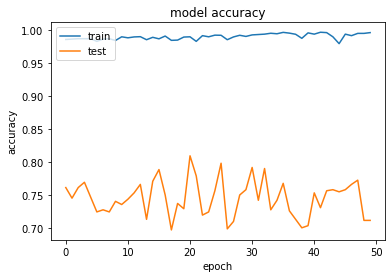

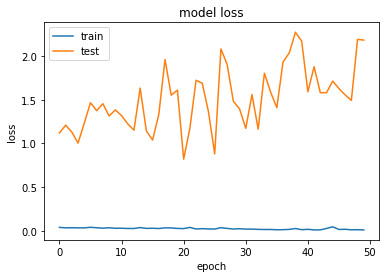

In [47]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [48]:
history = model_one.fit(x_train, y_train, 
      epochs=30,            
      verbose=1,
      validation_data = (x_test, y_test))

Epoch 1/30
163/163 [==============================] - 3s 16ms/step - loss: 0.0651 - accuracy: 0.9783 - val_loss: 1.3612 - val_accuracy: 0.7724
Epoch 2/30
163/163 [==============================] - 2s 12ms/step - loss: 0.0401 - accuracy: 0.9849 - val_loss: 0.9231 - val_accuracy: 0.8237
Epoch 3/30
163/163 [==============================] - 2s 14ms/step - loss: 0.0310 - accuracy: 0.9877 - val_loss: 1.4496 - val_accuracy: 0.7596
Epoch 4/30
163/163 [==============================] - 4s 22ms/step - loss: 0.0556 - accuracy: 0.9797 - val_loss: 1.8229 - val_accuracy: 0.7356
Epoch 5/30
163/163 [==============================] - 2s 13ms/step - loss: 0.0417 - accuracy: 0.9835 - val_loss: 1.5313 - val_accuracy: 0.7580
Epoch 6/30
163/163 [==============================] - 2s 14ms/step - loss: 0.0188 - accuracy: 0.9944 - val_loss: 1.3141 - val_accuracy: 0.7788
Epoch 7/30
163/163 [==============================] - 3s 20ms/step - loss: 0.0313 - accuracy: 0.9872 - val_loss: 1.1704 - val_accuracy: 0.7869

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


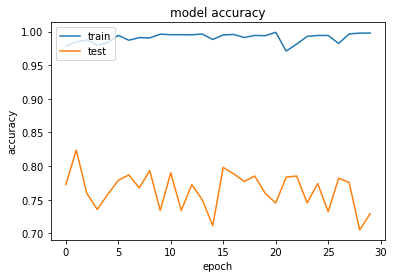

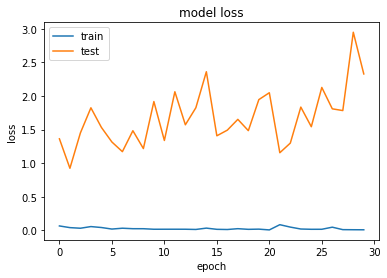

In [49]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [50]:
model_four = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(128, 128, 1)),
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')])


In [51]:
model_four.compile(optimizer = tf.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [52]:
history = model_four.fit(x_train, y_train, 
      batch_size = 200,
      epochs=30,            
      verbose=1,
      validation_data = (x_test, y_test))

Epoch 1/30
27/27 [==============================] - 22s 774ms/step - loss: 0.6369 - accuracy: 0.6988 - val_loss: 0.4669 - val_accuracy: 0.7452
Epoch 2/30
27/27 [==============================] - 20s 734ms/step - loss: 0.1978 - accuracy: 0.9311 - val_loss: 0.7807 - val_accuracy: 0.7228
Epoch 3/30
27/27 [==============================] - 20s 738ms/step - loss: 0.1244 - accuracy: 0.9511 - val_loss: 0.6838 - val_accuracy: 0.7612
Epoch 4/30
27/27 [==============================] - 20s 733ms/step - loss: 0.0962 - accuracy: 0.9645 - val_loss: 0.9041 - val_accuracy: 0.7596
Epoch 5/30
27/27 [==============================] - 20s 737ms/step - loss: 0.0774 - accuracy: 0.9703 - val_loss: 1.3914 - val_accuracy: 0.7067
Epoch 6/30
27/27 [==============================] - 20s 734ms/step - loss: 0.0970 - accuracy: 0.9639 - val_loss: 1.2253 - val_accuracy: 0.7147
Epoch 7/30
27/27 [==============================] - 20s 744ms/step - loss: 0.0690 - accuracy: 0.9766 - val_loss: 1.3488 - val_accuracy: 0.7147

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


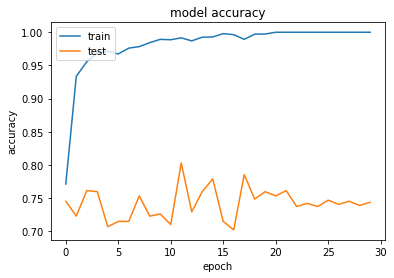

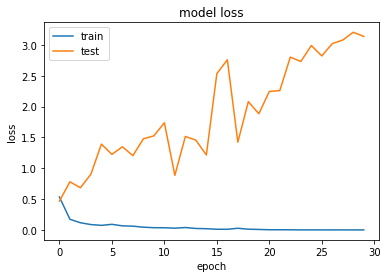

In [53]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [54]:
model_five = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(128, 128, 1)),
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')])

In [55]:
model_five.compile(optimizer = tf.optimizers.RMSprop(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [56]:
history = model_five.fit(x_train, y_train, 
      batch_size = 200,
      epochs=30,            
      verbose=1,
      validation_data = (x_test, y_test))

Epoch 1/30
27/27 [==============================] - 22s 764ms/step - loss: 1.0694 - accuracy: 0.7122 - val_loss: 1.2144 - val_accuracy: 0.6330
Epoch 2/30
27/27 [==============================] - 21s 761ms/step - loss: 0.2579 - accuracy: 0.9001 - val_loss: 0.6010 - val_accuracy: 0.7740
Epoch 3/30
27/27 [==============================] - 20s 742ms/step - loss: 0.1704 - accuracy: 0.9396 - val_loss: 0.4563 - val_accuracy: 0.8013
Epoch 4/30
27/27 [==============================] - 20s 750ms/step - loss: 0.2167 - accuracy: 0.9181 - val_loss: 0.4723 - val_accuracy: 0.8333
Epoch 5/30
27/27 [==============================] - 20s 734ms/step - loss: 0.1161 - accuracy: 0.9562 - val_loss: 2.1633 - val_accuracy: 0.6490
Epoch 6/30
27/27 [==============================] - 21s 763ms/step - loss: 0.1636 - accuracy: 0.9314 - val_loss: 2.4535 - val_accuracy: 0.6603
Epoch 7/30
27/27 [==============================] - 20s 745ms/step - loss: 0.1302 - accuracy: 0.9522 - val_loss: 0.5067 - val_accuracy: 0.8333

In [1]:
import matplotlib.pyplot as plt

print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

In [58]:
history = model_five.fit(x_train, y_train, 
      batch_size = 200,
      epochs=30,            
      verbose=1,
      validation_data = (x_test, y_test))

Epoch 1/30
27/27 [==============================] - 20s 740ms/step - loss: 5.9287e-04 - accuracy: 1.0000 - val_loss: 7.0393 - val_accuracy: 0.6667
Epoch 2/30
27/27 [==============================] - 20s 755ms/step - loss: 0.0805 - accuracy: 0.9856 - val_loss: 2.7517 - val_accuracy: 0.7388
Epoch 3/30
27/27 [==============================] - 20s 743ms/step - loss: 8.7499e-04 - accuracy: 1.0000 - val_loss: 3.1838 - val_accuracy: 0.7404
Epoch 4/30
27/27 [==============================] - 20s 757ms/step - loss: 2.6228e-04 - accuracy: 1.0000 - val_loss: 3.4449 - val_accuracy: 0.7436
Epoch 5/30
27/27 [==============================] - 21s 756ms/step - loss: 7.8657e-05 - accuracy: 1.0000 - val_loss: 4.0953 - val_accuracy: 0.7404
Epoch 6/30
27/27 [==============================] - 20s 739ms/step - loss: 0.0851 - accuracy: 0.9906 - val_loss: 4.1067 - val_accuracy: 0.7099
Epoch 7/30
27/27 [==============================] - 20s 732ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 3.5229 - val_

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


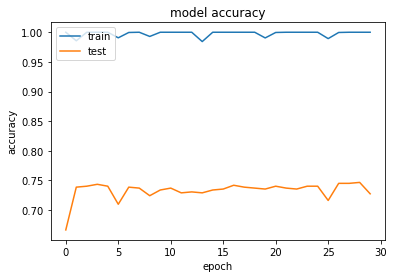

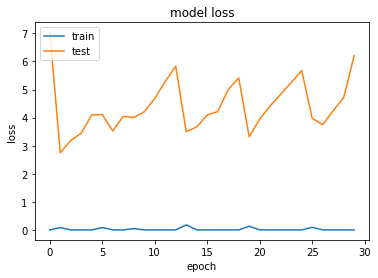

In [59]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()